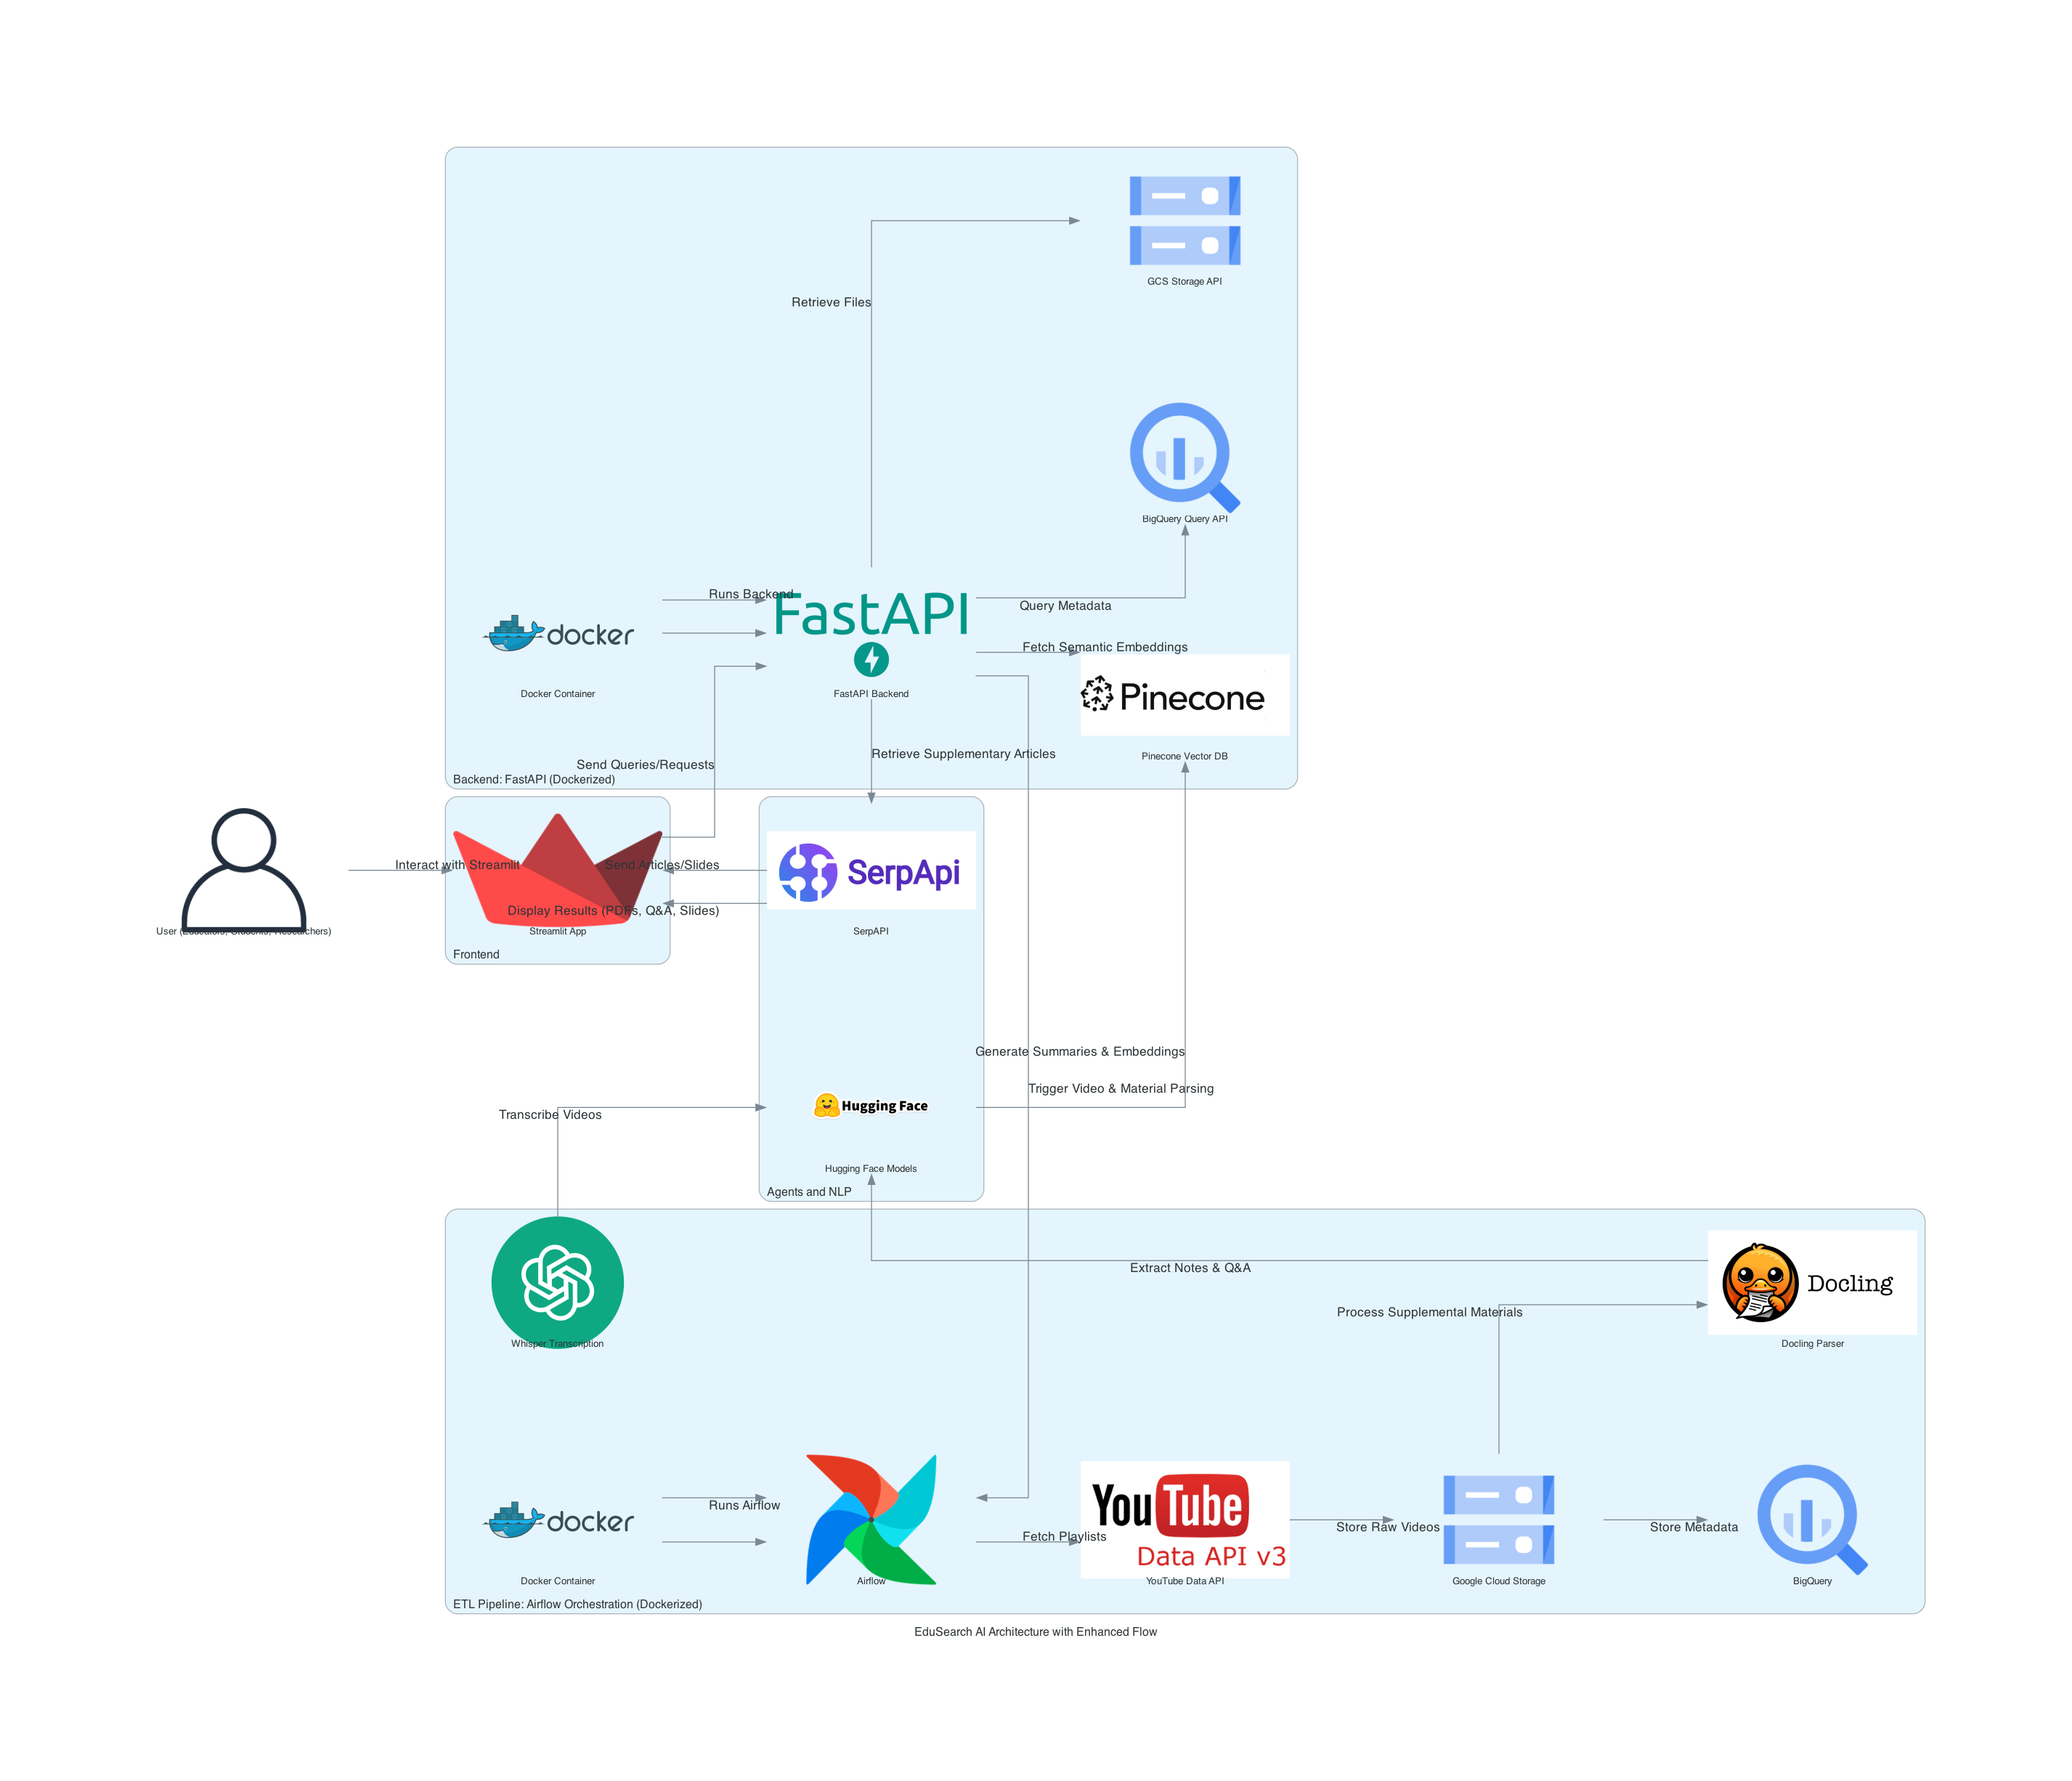

In [49]:
from diagrams import Diagram, Cluster, Edge
from diagrams.gcp.storage import GCS
from diagrams.gcp.analytics import BigQuery
from diagrams.onprem.workflow import Airflow
from diagrams.custom import Custom
from diagrams.onprem.client import User

# Custom logos
streamlit_logo = "streamlit_logo.png"
pinecone_logo = "pinecone_logo.png"
youtube_logo = "youtube_logo.png"
huggingface_logo = "huggingface_logo.png"
whisper_logo = "whisper_logo.png"
serpapi_logo = "serpapi_logo.png"
docker_logo = "docker_logo.png"
docling_logo = "docling-logo.png"

# Diagram attributes
graph_attr = {
    "fontsize": "12",
    "labelloc": "b",
    "nodesep": "1.5",
    "ranksep": "1.5",
}

node_attr = {
    "fontsize": "10",
    "width": "3.0",  # Increased width
    "height": "2.5",  # Increased height
}

with Diagram(
    "EduSearch AI Architecture with Enhanced Flow",
    show=False,
    filename="edusearch_ai_enhanced_flow",
    outformat="png",
    graph_attr=graph_attr,
    node_attr=node_attr,
) as diag:
    # User Interaction Layer
    user = User("User (Educators, Students, Researchers)")

    # Frontend Layer
    with Cluster("Frontend"):
        streamlit = Custom("Streamlit App", streamlit_logo)

    # Backend Layer
    with Cluster("Backend: FastAPI (Dockerized)"):
        docker_backend = Custom("Docker Container", docker_logo)
        fastapi = Custom("FastAPI Backend", "fastapi_logo.png")
        pinecone = Custom("Pinecone Vector DB", pinecone_logo)
        bigquery_api = BigQuery("BigQuery Query API")
        gcs_api = GCS("GCS Storage API")
        docker_backend >> fastapi

    # ETL Pipeline Layer
    with Cluster("ETL Pipeline: Airflow Orchestration (Dockerized)"):
        docker_airflow = Custom("Docker Container", docker_logo)
        airflow = Airflow("Airflow")
        youtube_api = Custom("YouTube Data API", youtube_logo)
        whisper = Custom("Whisper Transcription", whisper_logo)
        docling = Custom("Docling Parser", docling_logo)
        gcs = GCS("Google Cloud Storage")
        bigquery = BigQuery("BigQuery")
        docker_airflow >> airflow

    # Agentic Architecture Layer
    with Cluster("Agents and NLP"):
        huggingface = Custom("Hugging Face Models", huggingface_logo)
        serpapi = Custom("SerpAPI", serpapi_logo)

    # Connections
    # User Interaction Flow
    user >> Edge(xlabel="Interact with Streamlit") >> streamlit
    streamlit >> Edge(xlabel="Send Queries/Requests") >> fastapi
    streamlit << Edge(xlabel="Display Results (PDFs, Q&A, Slides)") << serpapi

    # Backend Connections
    fastapi >> Edge(xlabel="Fetch Semantic Embeddings") >> pinecone
    fastapi >> Edge(xlabel="Query Metadata") >> bigquery_api
    fastapi >> Edge(xlabel="Retrieve Files") >> gcs_api

    # Backend Deployment
    docker_backend >> Edge(xlabel="Runs Backend") >> fastapi

    # Pipeline Flow
    fastapi >> Edge(xlabel="Trigger Video & Material Parsing") >> airflow
    docker_airflow >> Edge(xlabel="Runs Airflow") >> airflow
    airflow >> Edge(xlabel="Fetch Playlists") >> youtube_api
    youtube_api >> Edge(xlabel="Store Raw Videos") >> gcs
    gcs >> Edge(xlabel="Store Metadata") >> bigquery
    gcs >> Edge(xlabel="Process Supplemental Materials") >> docling
    docling >> Edge(xlabel="Extract Notes & Q&A") >> huggingface
    whisper >> Edge(xlabel="Transcribe Videos") >> huggingface
    huggingface >> Edge(xlabel="Generate Summaries & Embeddings") >> pinecone

    # Material Retrieval
    fastapi >> Edge(xlabel="Retrieve Supplementary Articles") >> serpapi
    serpapi >> Edge(xlabel="Send Articles/Slides") >> streamlit

diag
